In [225]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [226]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

In [227]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
df_RRHH_16062025
MySQL connection is closed


In [228]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [229]:
df_RRHH_16062025.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Transportation_expense', 'Distance_Residence_Work', 'Service_time',
       'Age', 'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_hours'],
      dtype='object')

In [230]:
df_RRHH.head(15)

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,2,155,12,14,34,"284,031",97,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,4,118,13,18,50,"239,409",98,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",93,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",92,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,4,228,14,16,58,"222,196",99,0,1,2,0,0,1,65,172,22,112
5,11,19,3,2,4,289,36,13,33,"222,196",99,0,1,2,1,0,1,90,172,30,104
6,36,13,6,4,1,118,13,18,50,"377,550",94,0,1,1,1,0,0,98,178,31,80
7,14,18,12,3,3,155,12,14,34,"280,549",98,0,1,2,1,0,0,95,196,25,80
8,13,13,7,2,1,369,17,12,31,"264,604",93,0,1,3,1,0,0,70,169,25,80
9,34,19,12,3,3,118,10,10,37,"261,306",97,0,1,0,0,0,0,83,172,28,64


In [231]:
df_RRHH_16062025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       840 non-null    int64 
 1   Reason_absence           840 non-null    int64 
 2   Month_absence            840 non-null    int64 
 3   Day_week                 840 non-null    int64 
 4   Seasons                  840 non-null    int64 
 5   Transportation_expense   840 non-null    int64 
 6   Distance_Residence_Work  840 non-null    int64 
 7   Service_time             840 non-null    int64 
 8   Age                      840 non-null    int64 
 9   Work_load_Average_day    840 non-null    object
 10  Hit_target               840 non-null    int64 
 11  Disciplinary_failure     840 non-null    object
 12  Education                840 non-null    object
 13  Son                      840 non-null    int64 
 14  Social_drinker           840 non-null    o

In [232]:
desempeño_profesional = df_RRHH_16062025[['ID', 'Hit_target', 'Disciplinary_failure', 'Service_time','Work_load_Average_day', 'Age', 'Son', 'Education','Social_drinker', 'Social_smoker', 'Distance_Residence_Work']].drop_duplicates(subset='ID').reset_index(drop=True)
desempeño_profesional.head(10)

,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work
0,1,98,1,14,244.387,37,1,3,0,0,11
1,2,96,1,12,326.452,48,1,1,0,1,29
2,3,95,1,18,253.957,38,0,1,1,0,51
3,4,95,0,13,271.219,40,1,1,1,0,14
4,5,81,1,13,294.217,43,1,1,1,0,20
5,6,97,0,13,239.554,33,2,1,0,0,29
6,7,92,1,14,378.884,39,2,1,1,1,5
7,8,95,0,14,271.219,39,2,1,1,0,35
8,9,91,0,16,284.853,58,2,1,0,0,14
9,10,99,0,3,237.656,28,1,1,1,0,52


In [233]:
desempeño_profesional


,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work
0,1,98,1,14,244.387,37,1,3,0,0,11
1,2,96,1,12,326.452,48,1,1,0,1,29
2,3,95,1,18,253.957,38,0,1,1,0,51
3,4,95,0,13,271.219,40,1,1,1,0,14
4,5,81,1,13,294.217,43,1,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...
131,132,94,0,14,377.550,37,1,3,0,0,11
132,133,96,0,14,313.532,34,2,1,1,0,12
133,134,88,1,18,265.017,50,1,1,1,0,13
134,135,97,0,9,264.249,28,1,1,0,0,26


total de empleados 136 - KPI - presentación

* Cambio de tipo de datos

In [234]:
# Asegura que los valores de 'Education' sean enteros
desempeño_profesional['Education'] = pd.to_numeric(desempeño_profesional['Education'], errors='coerce')
desempeño_profesional['Education'] = desempeño_profesional['Education'].astype(int)

# Asegura que los valores de '' sean enteros
desempeño_profesional['Work_load_Average_day'] = pd.to_numeric(desempeño_profesional['Work_load_Average_day'], errors='coerce')
desempeño_profesional['Work_load_Average_day'] = desempeño_profesional['Work_load_Average_day'].astype(int)

desempeño_profesional['Social_drinker'] = pd.to_numeric(desempeño_profesional['Social_drinker'], errors='coerce')
desempeño_profesional['Social_drinker'] = desempeño_profesional['Social_drinker'].astype(int)

desempeño_profesional['Social_smoker'] = pd.to_numeric(desempeño_profesional['Social_smoker'], errors='coerce')
desempeño_profesional['Social_smoker'] = desempeño_profesional['Social_smoker'].astype(int)

desempeño_profesional['Disciplinary_failure'] = pd.to_numeric(desempeño_profesional['Disciplinary_failure'], errors='coerce')
desempeño_profesional['Disciplinary_failure'] = desempeño_profesional['Disciplinary_failure'].astype(int)

desempeño_profesional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       136 non-null    int64
 1   Hit_target               136 non-null    int64
 2   Disciplinary_failure     136 non-null    int64
 3   Service_time             136 non-null    int64
 4   Work_load_Average_day    136 non-null    int64
 5   Age                      136 non-null    int64
 6   Son                      136 non-null    int64
 7   Education                136 non-null    int64
 8   Social_drinker           136 non-null    int64
 9   Social_smoker            136 non-null    int64
 10  Distance_Residence_Work  136 non-null    int64
dtypes: int64(11)
memory usage: 11.8 KB


In [235]:
desempeño_profesional.describe()

,ID,Hit_target,Disciplinary_failure,Service_time,Work_load_Average_day,Age,Son,Education,Social_drinker,Social_smoker,Distance_Residence_Work
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,94.352941,0.161765,12.095588,277.720588,36.279412,1.095588,1.257353,0.588235,0.066176,29.742647
std,39.403892,4.167830,0.369596,4.406861,35.156305,6.992791,1.046183,0.632412,0.493972,0.249509,14.229337
min,1.000000,81.000000,0.000000,1.000000,222.000000,27.000000,0.000000,1.000000,0.000000,0.000000,5.000000
25%,34.750000,92.000000,0.000000,9.000000,251.000000,30.750000,0.000000,1.000000,0.000000,0.000000,17.000000
50%,68.500000,95.000000,0.000000,12.000000,266.500000,36.000000,1.000000,1.000000,1.000000,0.000000,26.000000
75%,102.250000,97.000000,0.000000,14.000000,294.000000,40.000000,2.000000,1.000000,1.000000,0.000000,42.000000
max,136.000000,100.000000,1.000000,29.000000,378.000000,58.000000,4.000000,3.000000,1.000000,1.000000,52.000000


El empleado con mayor tiempo de servicio (29 años) tiene 49 años, entonces el tiempo de servicio está en años.

In [236]:
# Muestra la columna 'Age' donde 'Service_time' es 29
edad = desempeño_profesional.loc[desempeño_profesional['Service_time'] == 29, 'Age']
print(edad)

31    49
Name: Age, dtype: int64


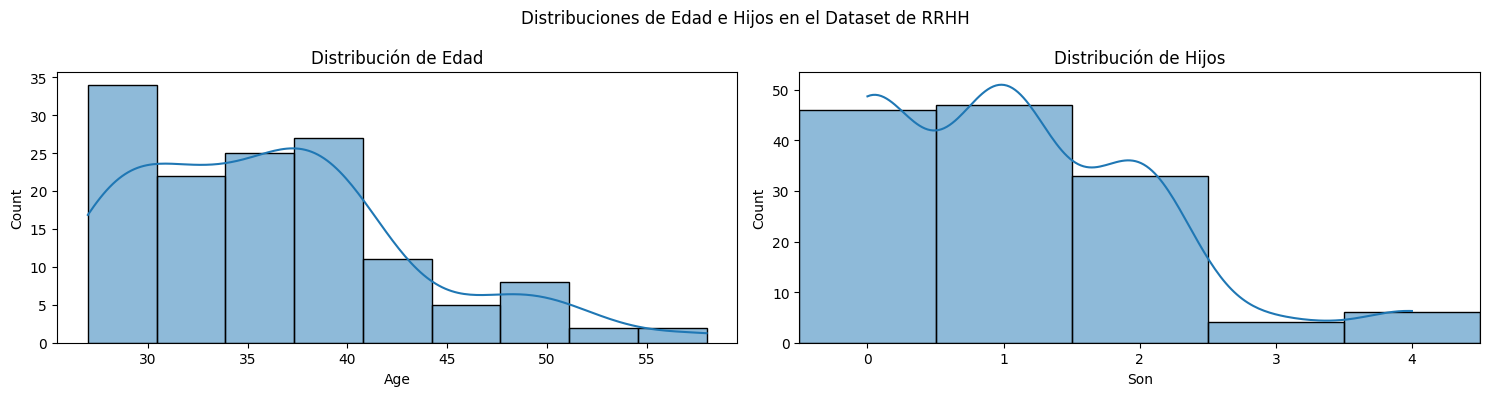

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(desempeño_profesional['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Edad")


sns.histplot(
    desempeño_profesional['Son'],
    kde=True,
    ax=axs[1],
    bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
)
axs[1].set_title("Distribución de Hijos")
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_xlim(-0.5, 4.5)
plt.suptitle("Distribuciones de Edad e Hijos en el Dataset de RRHH")

plt.tight_layout()
plt.show()

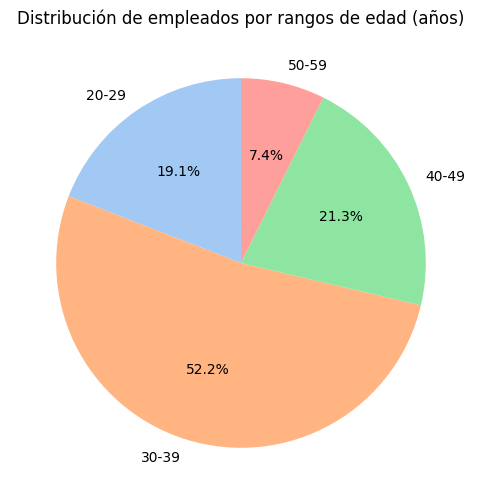

In [266]:
age_bins = [20, 30, 40, 50, 60] 
age_labels = ['20-29', '30-39', '40-49', '50-59']
desempeño_profesional['Age_group'] = pd.cut(desempeño_profesional['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = desempeño_profesional['Age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(age_labels)]
)
plt.title("Distribución de empleados por rangos de edad (años)")
plt.show()

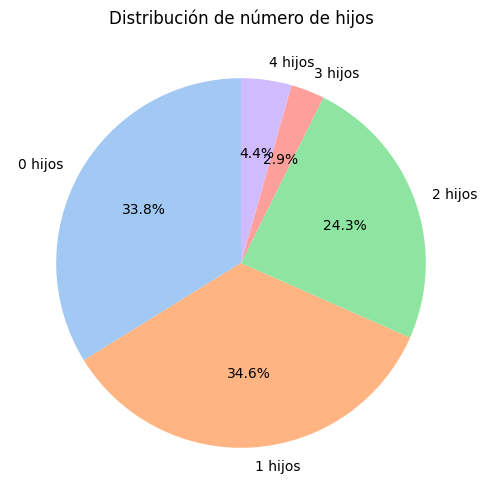

In [267]:
son_counts = desempeño_profesional['Son'].value_counts().sort_index()
labels = [f'{i} hijos' for i in son_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    son_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(son_counts)]
)
plt.title("Distribución de número de hijos")
plt.show()

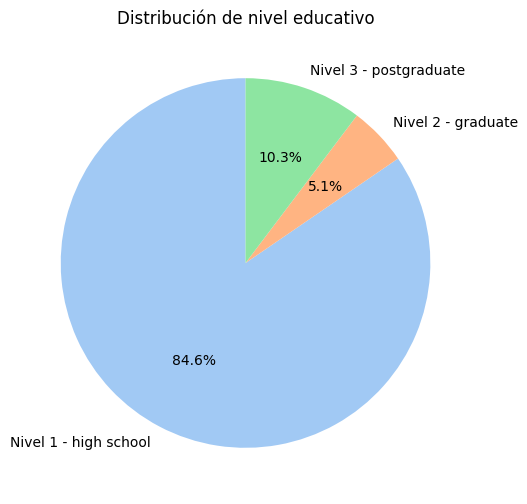

In [269]:
education_counts = desempeño_profesional['Education'].value_counts().sort_index()
labels = ['Nivel 1 - high school', 'Nivel 2 - graduate', 'Nivel 3 - postgraduate']  # Ajusta los nombres si tienes descripciones

plt.figure(figsize=(6, 6))
plt.pie(
    education_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:3]
)
plt.title("Distribución de nivel educativo")
plt.show()

## Regresión Lineal

In [ ]:
# Modelado y evaluación
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Análisis estadístico detallado
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SELECCIÓN DE VARIABLES (X) Y TARGET (y)

X = desempeño_profesional[['Age', 'Son', 'Social_drinker', 'Social_smoker', 'Education','Distance_Residence_Work', 'Disciplinary_failure']]
y = desempeño_profesional['Hit_target']

# Eliminar valores faltantes
X = X.dropna()
y = y.loc[X.index]

# DIVIDIR EN TRAIN / TEST

lr = LinearRegression()
lr.fit(X_train, y_train)

# ANÁLISIS ESTADÍSTICO CON STATSMODELS
#    (coeficientes, p‑values, R² ajustado, etc.)
# ---------------------------------------------
X_sm = sm.add_constant(X)  # agrega intercepto
model = sm.OLS(y, X_sm).fit()
display(model.summary())

# MULTICOLINEALIDAD (VIF)
# ---------------------------------------------
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})
display(vif_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Hit_target   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.292
Date:                Thu, 26 Jun 2025   Prob (F-statistic):             0.0312
Time:                        07:57:35   Log-Likelihood:                -378.57
No. Observations:                 136   AIC:                             773.1
Df Residuals:                     128   BIC:                             796.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      95.6343      2.684     35.630      0.000      90.323     100.945
Age                         0.0108      0.053      0.204      0.839      -0.094       0.116
Son                         0.3867      0.357      1.083      0.281      -0.320       1.093
Social_drinker             -1.4395      0.820     -1.756      0.081      -3.061       0.182
Social_smoker               0.8457      1.450      0.583      0.561      -2.023       3.715
Education                  -0.1445      0.636     -0.227      0.821      -1.404       1.115
Distance_Residence_Work    -0.0206      0.027     -0.766      0.445      -0.074       0.033
Disciplinary_failure       -3.1618      0.971     -3.255      0.001      -5.084      -1.240
==============================================================================
Omnibus:                       28.846   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.973
Skew:                          -1.099   Prob(JB):                     7.68e-10
Kurtosis:                       4.606   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Variable,VIF
0,Age,9.355209
1,Son,2.298527
2,Social_drinker,3.270431
3,Social_smoker,1.160688
4,Education,4.304549
5,Distance_Residence_Work,4.960356
6,Disciplinary_failure,1.270388


## Distribucion de Hit_target por Disciplinary_failure (variable numerica y variable binaria) 
 
✅ Grupo Disciplinary_failure = 0:
Tiene una forma más asimétrica a la izquierda (ligera), pero aproximadamente campaniforme.

La curva de densidad muestra un pico claro, lo cual es típico de una distribución normal con poco sesgo.

Visualmente, podría cumplir con normalidad aproximada.

❌ Grupo Disciplinary_failure = 1:
La distribución es plana y dispersa, con pocos datos (la curva es casi uniforme).

Esto indica que los valores están más repartidos y no siguen una forma normal.

🧠 Conclusión (hasta aquí):
🔹 No puedes asumir normalidad para ambos grupos.

➡️ Por lo tanto, lo correcto estadísticamente es usar una prueba no paramétrica, es decir:

✅ Usa: Mann-Whitney U test
Este test compara las distribuciones de Hit_target entre los grupos con y sin fallos disciplinarios, sin asumir normalidad.

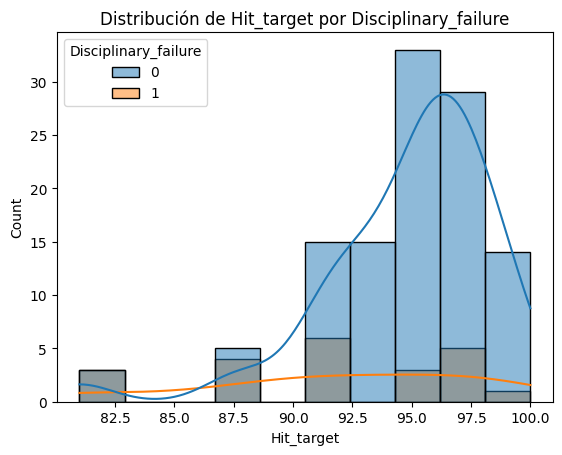

In [239]:
import scipy.stats as stats

# Histograma
sns.histplot(data=desempeño_profesional, x="Hit_target", hue="Disciplinary_failure", kde=True)
plt.title("Distribución de Hit_target por Disciplinary_failure")
plt.show()


Test de normalidad formal
✅ Shapiro-Wilk test (recomendado si tienes <5000 observaciones):

Si p > 0.05 → no se rechaza la normalidad → puedes usar t-test.

Si p ≤ 0.05 → los datos no son normales → mejor usar Mann-Whitney U.

In [240]:
from scipy.stats import shapiro

for group in [0, 1]:
    data = desempeño_profesional[desempeño_profesional['Disciplinary_failure'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0000
Grupo 1 - Shapiro-Wilk p-value: 0.0160


## Mann-Whitney U test
Este test compara las distribuciones de Hit_target entre los grupos con y sin fallos disciplinarios, sin asumir normalidad.

Como p-value = 0.0369 < 0.05, se rechaza la hipótesis nula de que ambos grupos (Disciplinary_failure = 0 y 1) tienen distribuciones iguales de Hit_target.
Hay una diferencia estadísticamente significativa en el desempeño (Hit_target) entre los empleados con y sin fallos disciplinarios.
Y dado que el gráfico mostraba que quienes no tienen fallos disciplinarios tienden a tener mayores valores de Hit_target, podemos concluir: 
## Los empleados que no tienen fallos disciplinarios tienden a tener un mejor desempeño (mayor Hit_target).

Prueba mannwhitneyu: U = 1605.50, p-value = 0.0369


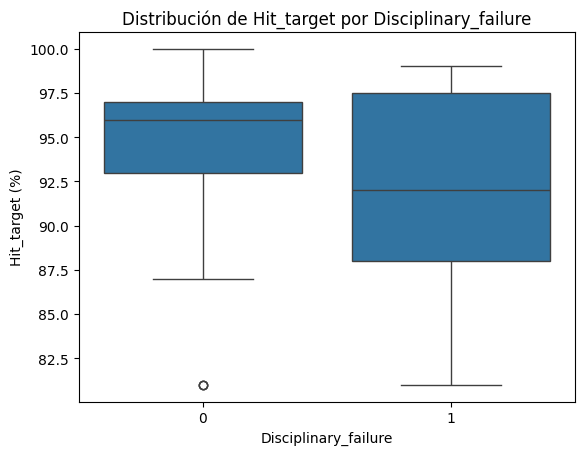

In [273]:
from scipy.stats import mannwhitneyu

grupo_0 = desempeño_profesional[desempeño_profesional['Disciplinary_failure'] == 0]['Hit_target']
grupo_1 = desempeño_profesional[desempeño_profesional['Disciplinary_failure'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualización de la distribución de Hit_target por Disciplinary_failure
sns.boxplot(x='Disciplinary_failure', y='Hit_target', data=desempeño_profesional)
plt.title("Distribución de Hit_target por Disciplinary_failure")
plt.xlabel("Disciplinary_failure")
plt.ylabel("Hit_target (%)")
plt.show()


In [274]:
# Encuentra el valor atípico en Hit_target para empleados sin fallas disciplinarias (Disciplinary_failure = 0)
q1 = desempeño_profesional.loc[desempeño_profesional['Disciplinary_failure'] == 0, 'Hit_target'].quantile(0.25)
q3 = desempeño_profesional.loc[desempeño_profesional['Disciplinary_failure'] == 0, 'Hit_target'].quantile(0.75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtra el/los outlier(s)
outliers = desempeño_profesional[
    (desempeño_profesional['Disciplinary_failure'] == 0) &
    ((desempeño_profesional['Hit_target'] < lower_bound) | (desempeño_profesional['Hit_target'] > upper_bound))
]

# Muestra el/los ID(s) de los empleados atípicos
print("ID(s) de empleados con valor atípico en Hit_target (sin fallas disciplinarias):")
print(outliers['ID'].values)

ID(s) de empleados con valor atípico en Hit_target (sin fallas disciplinarias):
[50 51 89]


## Distribucion de Hit_target por Age ( 2 variables numericas)

<Figure size 1000x500 with 0 Axes>

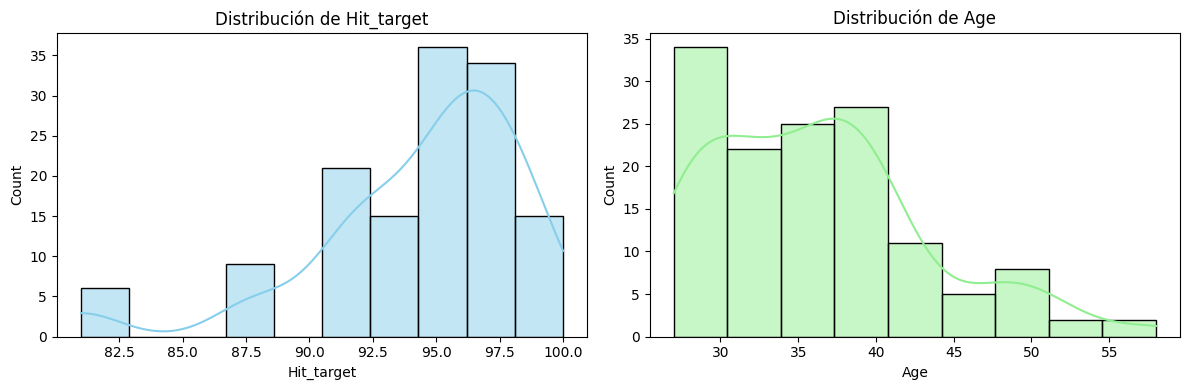

In [242]:
# Visualización de la distribución de 'Hit_target' y 'Age'
plt.figure(figsize=(10, 5)) 

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma Hit_target
sns.histplot(desempeño_profesional['Hit_target'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Hit_target')

# Histograma Age
sns.histplot(desempeño_profesional['Age'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Age')

plt.tight_layout()
plt.show()


Ninguna de las dos variables sigue una distribución normal.
Si ambos p > 0.05 → usa Pearson:
Si alguno p ≤ 0.05 → usa Spearman:

In [243]:
# Prueba de normalidad de Shapiro-Wilk para las columnas 'Hit_target' y 'Age'

# Shapiro para Hit_target
stat1, p1 = shapiro(desempeño_profesional['Hit_target'])
print(f"Hit_target - Shapiro p-value: {p1:.4f}")

# Shapiro para Age
stat2, p2 = shapiro(desempeño_profesional['Age'])
print(f"Age - Shapiro p-value: {p2:.4f}")


Hit_target - Shapiro p-value: 0.0000
Age - Shapiro p-value: 0.0000


## Spearman’s Rank Correlation Coefficient
Este test no asume normalidad y detecta relaciones monótonas (creciente o decreciente, no necesariamente lineal).

## No hay evidencia estadísticamente significativa de una relación entre la edad del empleado y su nivel de cumplimiento de objetivos

Spearman rho = 0.035, p-value = 0.6838


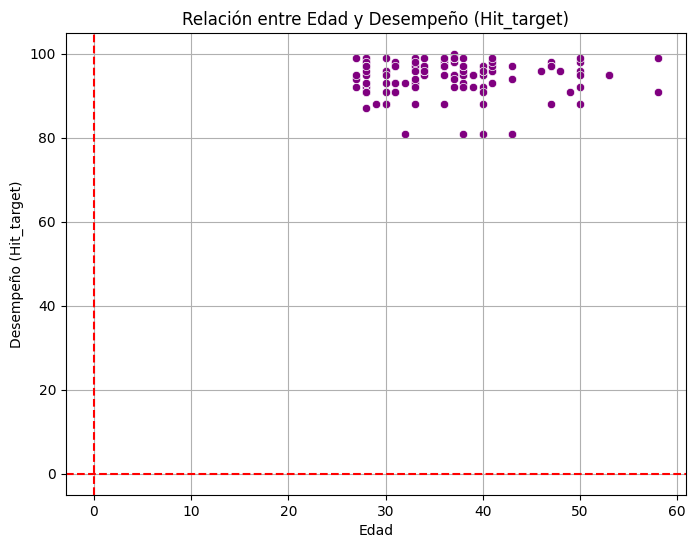

In [244]:
from scipy.stats import spearmanr
r, p = spearmanr(desempeño_profesional['Hit_target'], desempeño_profesional['Age'])
print(f"Spearman rho = {r:.3f}, p-value = {p:.4f}")

# Visualización de la relación entre 'Hit_target' y 'Age'
plt.figure(figsize=(8, 6))      
sns.scatterplot(x='Age', y='Hit_target', data=desempeño_profesional, color='purple')
plt.title('Relación entre Edad y Desempeño (Hit_target)')   
plt.xlabel('Edad')
plt.ylabel('Desempeño (Hit_target)')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.axvline(x=0, color='red', linestyle='--')  # Línea vertical en x=0
plt.grid(True)
plt.show()  # Muestra el gráfico


## Distribucion de Hit_target por social drinker (variable numerica y variable binaria) 

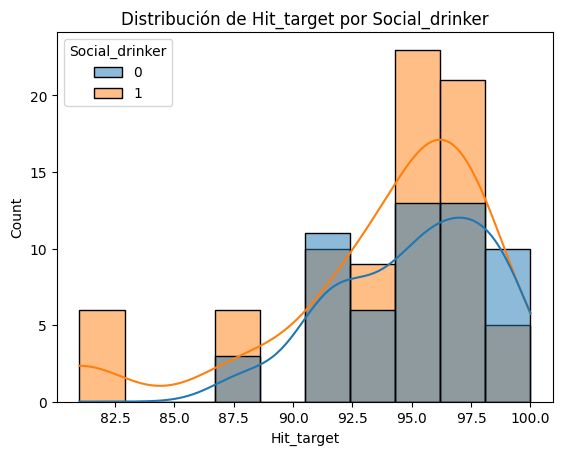

In [245]:
# Histograma
sns.histplot(data=desempeño_profesional, x="Hit_target", hue="Social_drinker", kde=True)
plt.title("Distribución de Hit_target por Social_drinker")
plt.show()

In [246]:
for group in [0, 1]:
    data = desempeño_profesional[desempeño_profesional['Social_drinker'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0044
Grupo 1 - Shapiro-Wilk p-value: 0.0000


## No hay evidencia estadísticamente significativa de una relación entre social_drinker del empleado y su nivel de cumplimiento de objetivos

Prueba mannwhitneyu: U = 2518.00, p-value = 0.2169


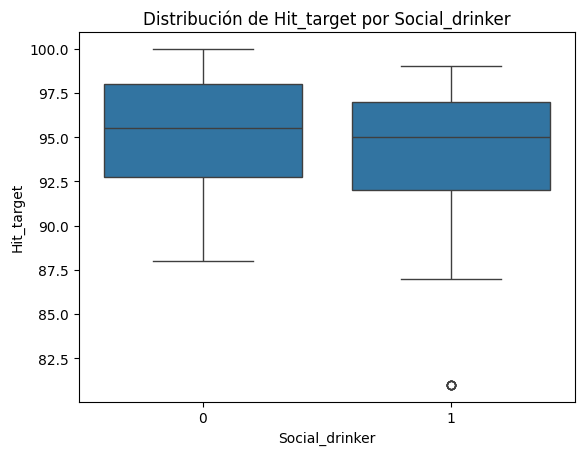

In [247]:
grupo_0 = desempeño_profesional[desempeño_profesional['Social_drinker'] == 0]['Hit_target']
grupo_1 = desempeño_profesional[desempeño_profesional['Social_drinker'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualización de la distribución de Hit_target por Social_drinker
sns.boxplot(x='Social_drinker', y='Hit_target', data=desempeño_profesional)
plt.title("Distribución de Hit_target por Social_drinker")
plt.xlabel("Social_drinker")
plt.ylabel("Hit_target")
plt.show()


## Distribucion de Hit_target por Son (2 variables numericas) 

Este gráfico (boxplot) muestra cómo varía el desempeño según número de hijos y si hay diferencias claras entre los grupos.

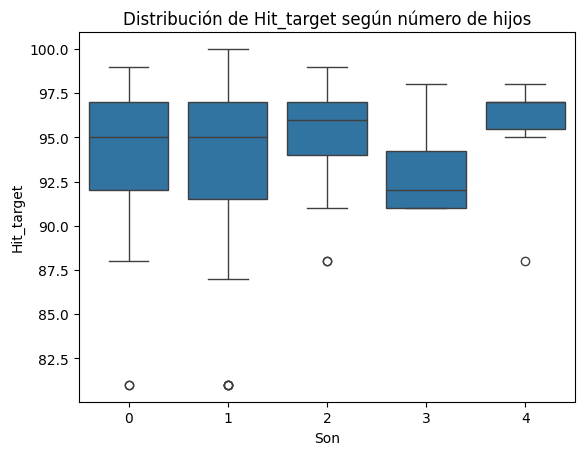

<Figure size 1000x500 with 0 Axes>

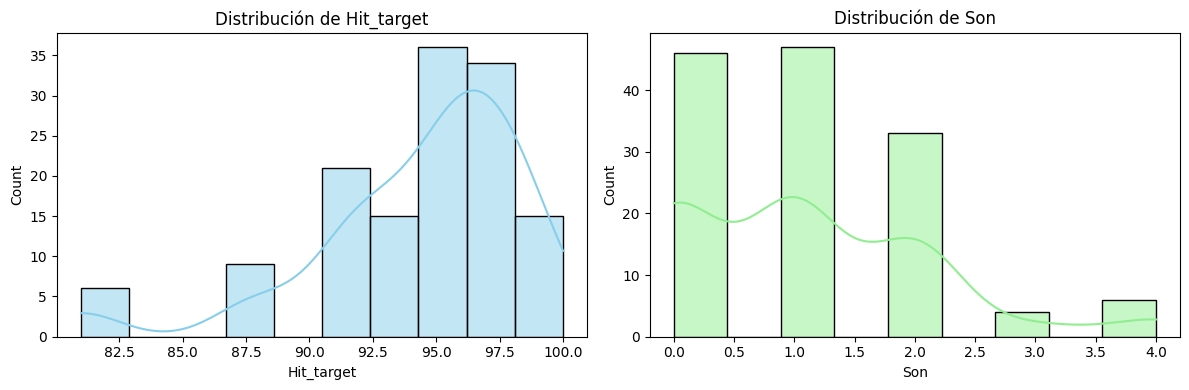

In [248]:
# Visualización de la distribución de 'Hit_target' y 'Social_drinker'

sns.boxplot(data=desempeño_profesional, x='Son', y='Hit_target')
plt.title('Distribución de Hit_target según número de hijos')
plt.show()

# Visualización de la distribución de 'Hit_target' y 'Son'
plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Histograma Hit_target
sns.histplot(desempeño_profesional['Hit_target'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Hit_target')
# Histograma Son
sns.histplot(desempeño_profesional['Son'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Son')    
plt.tight_layout()
plt.show()


| Número de hijos (`Son`) | p-value | ¿Distribución normal? |
| ----------------------- | ------- | --------------------- |
| 0                       | 0.0001  | ❌ No                  |
| 1                       | 0.0000  | ❌ No                  |
| 2                       | 0.0131  | ❌ No                  |
| 3                       | 0.1170  | ✅ Sí                  |
| 4                       | 0.0070  | ❌ No                  |

Si hubiese normalidad podría usar anova

In [249]:
for hijos in sorted(desempeño_profesional['Son'].unique()):
    grupo = desempeño_profesional[desempeño_profesional['Son'] == hijos]['Hit_target']
    stat, p = shapiro(grupo)
    print(f'Son = {hijos} → Shapiro p-value = {p:.4f}')


Son = 0 → Shapiro p-value = 0.0001
Son = 1 → Shapiro p-value = 0.0000
Son = 2 → Shapiro p-value = 0.0131
Son = 3 → Shapiro p-value = 0.1170
Son = 4 → Shapiro p-value = 0.0070


Kruskal-Wallis
Este test no paramétrico compara si hay diferencias en la distribución de Hit_target entre los distintos grupos de Son, sin asumir normalidad.

## no hay evidencia estadísticamente significativa de que Hit_target (desempeño) varíe según el número de hijos (Son).

In [250]:
from scipy.stats import kruskal

grupo_0 = desempeño_profesional[desempeño_profesional['Son'] == 0]['Hit_target']
grupo_1 = desempeño_profesional[desempeño_profesional['Son'] == 1]['Hit_target']
grupo_2 = desempeño_profesional[desempeño_profesional['Son'] == 2]['Hit_target']
grupo_3 = desempeño_profesional[desempeño_profesional['Son'] == 3]['Hit_target']
grupo_4 = desempeño_profesional[desempeño_profesional['Son'] == 4]['Hit_target']

stat, p = kruskal(grupo_0, grupo_1, grupo_2, grupo_3, grupo_4)
print(f'Kruskal-Wallis H = {stat:.4f}, p-value = {p:.4f}')


Kruskal-Wallis H = 2.6497, p-value = 0.6180


## Distribucion de Hit_target por Education (2 variables numericas) 

In [251]:
# Muestra los valores únicos en la columna 'Education'
valores_unicos_education = desempeño_profesional['Education'].unique()
print("Valores únicos en Education:", valores_unicos_education)

Valores únicos en Education: [3 1 2]


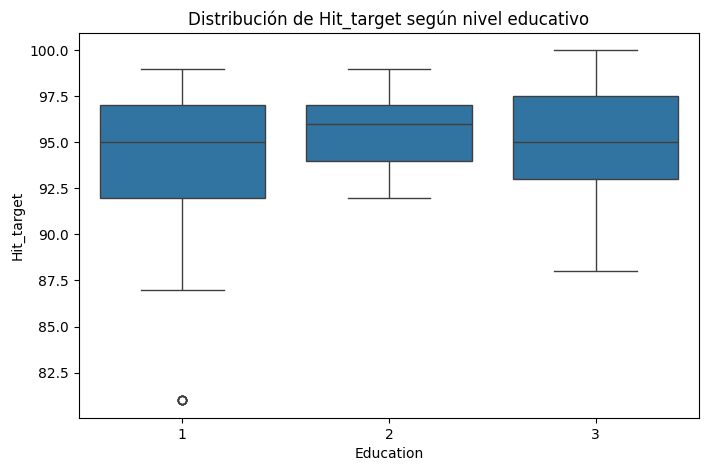

In [252]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Hit_target', data=desempeño_profesional)
plt.title('Distribución de Hit_target según nivel educativo')
plt.show()


In [253]:
for nivel in sorted(desempeño_profesional['Education'].unique()):
    grupo = desempeño_profesional[desempeño_profesional['Education'] == nivel]['Hit_target']
    stat, p = shapiro(grupo)
    print(f'Education = {nivel} → Shapiro p-value = {p:.4f}')


Education = 1 → Shapiro p-value = 0.0000
Education = 2 → Shapiro p-value = 0.8207
Education = 3 → Shapiro p-value = 0.4188


In [254]:
grupo_1 = desempeño_profesional[desempeño_profesional['Education'] == 1]['Hit_target']
grupo_2 = desempeño_profesional[desempeño_profesional['Education'] == 2]['Hit_target']
grupo_3 = desempeño_profesional[desempeño_profesional['Education'] == 3]['Hit_target']

stat, p = kruskal(grupo_1, grupo_2, grupo_3)
print(f'Kruskal-Wallis H = {stat:.4f}, p-value = {p:.4f}')


Kruskal-Wallis H = 0.3365, p-value = 0.8451


## Como el p-value = 0.8451 > 0.05, no hay evidencia estadísticamente significativa de que el nivel educativo (Education) esté asociado con diferencias en el desempeño (Hit_target).

## Distribucion de Hit_target por Distance_Residence_Work (2 variables numericas) 

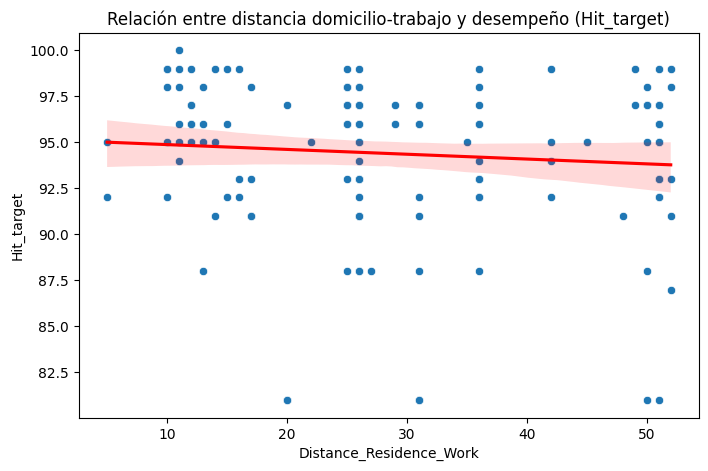

In [255]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance_Residence_Work', y='Hit_target', data=desempeño_profesional)
sns.regplot(x='Distance_Residence_Work', y='Hit_target', data=desempeño_profesional, scatter=False, color='red')
plt.title('Relación entre distancia domicilio-trabajo y desempeño (Hit_target)')
plt.show()


no hay normalidad

In [256]:
shapiro_hit = shapiro(desempeño_profesional['Hit_target'])
shapiro_dist = shapiro(desempeño_profesional['Distance_Residence_Work'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Distance_Residence_Work → Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target → Shapiro p-value = 0.0000
Distance_Residence_Work → Shapiro p-value = 0.0000


Correlación de Spearman
Este test no requiere normalidad y mide la relación monótona entre dos variables ordinales o continuas.

In [257]:

rho, pval = spearmanr(desempeño_profesional['Hit_target'], desempeño_profesional['Distance_Residence_Work'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")


Spearman rho = -0.1199, p-value = 0.1644


 Interpretación
No hay evidencia estadísticamente significativa de que exista una relación entre:

🔹 Distance_Residence_Work (distancia del hogar al trabajo)
🔹 y Hit_target (desempeño laboral)

en tu conjunto de datos.

📌 Conclusión práctica:
La distancia entre la residencia y el trabajo no parece afectar el desempeño medido por Hit_target.

Puedes considerar excluir esta variable si estás buscando predecir o explicar el desempeño.

## Distribucion de Hit_target por Social_smoker (variable numerica y binaria) 

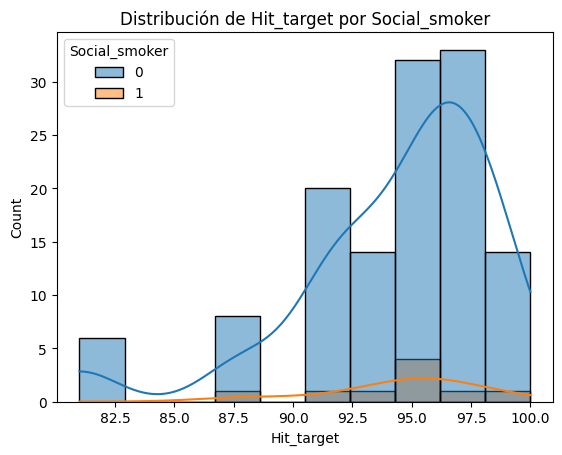

In [258]:
# Histograma
sns.histplot(data=desempeño_profesional, x="Hit_target", hue="Social_smoker", kde=True)
plt.title("Distribución de Hit_target por Social_smoker")
plt.show()

In [259]:
for group in [0, 1]:
    data = desempeño_profesional[desempeño_profesional['Social_smoker'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0000
Grupo 1 - Shapiro-Wilk p-value: 0.4087


no hay normalidad 

Prueba mannwhitneyu: U = 591.00, p-value = 0.8671


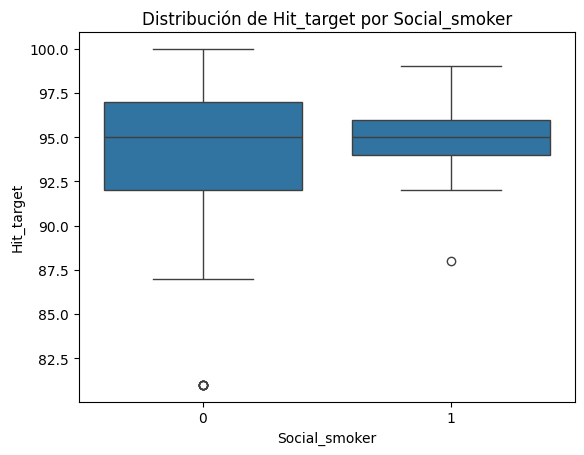

In [260]:
grupo_0 = desempeño_profesional[desempeño_profesional['Social_smoker'] == 0]['Hit_target']
grupo_1 = desempeño_profesional[desempeño_profesional['Social_smoker'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualización de la distribución de Hit_target por Social_smoker
sns.boxplot(x='Social_smoker', y='Hit_target', data=desempeño_profesional)
plt.title("Distribución de Hit_target por Social_smoker")
plt.xlabel("Social_smoker")
plt.ylabel("Hit_target")
plt.show()


no hay evidencia de que exista correlación significativa con Social_smoker

## Distribucion de Hit_target por Service_time (2 variables numericas) 

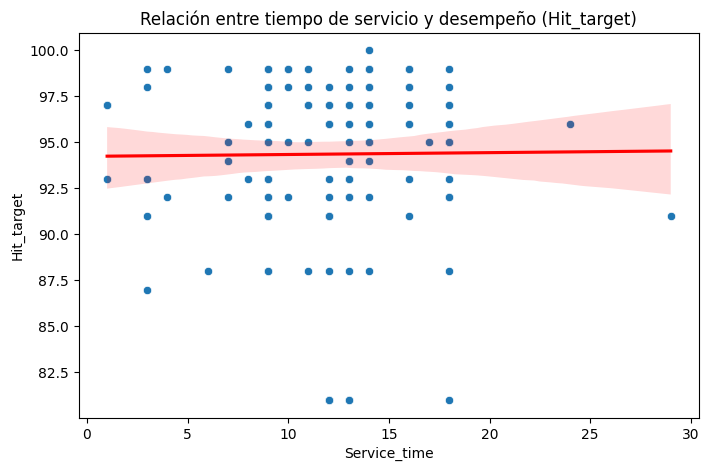

In [261]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Service_time', y='Hit_target', data=desempeño_profesional)
sns.regplot(x='Service_time', y='Hit_target', data=desempeño_profesional, scatter=False, color='red')
plt.title('Relación entre tiempo de servicio y desempeño (Hit_target)')
plt.show()

In [262]:
shapiro_hit = shapiro(desempeño_profesional['Hit_target'])
shapiro_dist = shapiro(desempeño_profesional['Service_time'])

print(f'Hit_target → Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Service_time → Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target → Shapiro p-value = 0.0000
Service_time → Shapiro p-value = 0.0001


no normalidad

In [263]:
rho, pval = spearmanr(desempeño_profesional['Hit_target'], desempeño_profesional['Service_time'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = 0.0558, p-value = 0.5186


dejar hasta aqui